# Capstone Project 1 - Part 3 
# Exploratory Data Analysis ( Inferential Statistics )

### Title: Data Visualization for later Prediction of electricity rates (cost/Kwh) and consumption 
### Author: Elizabeth Izarra

### General Problem:

Electricity has a very dynamic market price since it is a commodity that is essential for daily life and non-storable where generation and demand must be continuously balanced. This is turn make it dependable of the weather conditions. 

### Data Sources:

- U.S. Energy Information Administration (EIA)
- National Oceanic and Atmospheric Administration NOAA

See Capstone Project 1 - Part 1 Data Acquisition and Data Wrangling 

#### File used as source for this Capstone Project 1- Part 3:  
AllData_2.csv  - generated in Capstone Project 1 - Part 1 Data Acquisition and Data Wrangling

### Exploratory Data Analysis (Inferential Statistics)



#### Analysis of Average Retail Price of Electricity

In part 2 - Data Visualization, it was visualized that the average retail price of electricity has increased over the last years. A deeper analysis will be done in this part by comparing data from three years into the period 2001-2018. 

For this analysis the years 2001, 2009 and 2018 were selected for comparison purposes. The figure below shows the percentiles (boxplot) and distribution of the average retail price of electricity per region.

It is observed that there is a tendency in electricity price increase.  No remarkable outliers were identified. The regions with higher average price variance are the pacific continuos and non-continuos regions.


<img src="img_part3/price_regions.png">

A correlation between average temperature and price was visualized in Project1_Part2. In this part, it was quatified the correlation between Average Retail Price of electricity with respect to Average Temperature (TAVG), Maximum Temperature (TMAX) and Minimum Temperature (TMIN). The results are as follow

Correlation Price-TAVG= 0.08197931362708166

Correlation Price-TMAX= 0.04219035090794219

Correlation Price-TMIN= 0.12314931908777475

Since the higher correlation was between Price and TMIN, linear regressions for the years 2001, 2009 and 2018 for each region were computed and plotted below. It verify that the temperature has increased over the years and shows a correlation between temperature and electricity price. Regions with smaller variance are less sensitive to temperature changes (slope of the linear regresion is smaller)




<img src="img_part3/correlation_price_TMIN.png">



### -------------------------------------------------------------------------------------------------------------------------------------------------------

#### Importing relevant modules and defiing functions

In [1]:
# import the relevant modules
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import functions_definitions as fd

### Getting Data retrieved in Project_Part1: Data acquisition and data wrangling

In [2]:
#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data=df_data_orig.copy()
#delete any unnamed column product of saving DataFrames in range index to csv
df_data.drop(df_data.columns[df_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

#Add column Region to the DataFrame
for reg in df_reg.columns:
    #getting the data for the states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df_data.loc[idx_region,'region']=reg



In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 17 columns):
date                                        11016 non-null object
iso3166                                     11016 non-null object
Net generation                              11016 non-null float64
unit_x                                      11016 non-null object
Retail sales of electricity                 11016 non-null float64
unit_y                                      11016 non-null object
Revenue from retail sales of electricity    11015 non-null float64
unit_x.1                                    11016 non-null object
Average retail price of electricity         11016 non-null float64
unit_y.1                                    11016 non-null object
Number of customer accounts                 7078 non-null float64
unit                                        6732 non-null object
TAVG                                        11016 non-null float64
TMAX                         

In [4]:
df_data.head()

,date,iso3166,Net generation,unit_x,Retail sales of electricity,unit_y,Revenue from retail sales of electricity,unit_x.1,Average retail price of electricity,unit_y.1,Number of customer accounts,unit,TAVG,TMAX,TMIN,state,region
0,2018-12-01,USA-AK,508.48364,thousand megawatthours,541.79201,million kilowatthours,107.60184,million dollars,19.86,cents per kilowatthour,344957.0,number of customers,13.919636,19.644565,8.191273,Alaska,Pacific Noncontiguous
1,2018-11-01,USA-AK,459.47404,thousand megawatthours,507.34973,million kilowatthours,97.41503,million dollars,19.20,cents per kilowatthour,345444.0,number of customers,22.048986,27.529054,16.563514,Alaska,Pacific Noncontiguous
2,2018-10-01,USA-AK,437.14615,thousand megawatthours,472.18412,million kilowatthours,94.89770,million dollars,20.10,cents per kilowatthour,346050.0,number of customers,36.289632,43.016667,29.612667,Alaska,Pacific Noncontiguous
3,2018-09-01,USA-AK,566.15276,thousand megawatthours,466.33372,million kilowatthours,90.49571,million dollars,19.41,cents per kilowatthour,345366.0,number of customers,46.673422,55.364026,37.996678,Alaska,Pacific Noncontiguous
4,2018-08-01,USA-AK,636.60150,thousand megawatthours,471.08394,million kilowatthours,93.52328,million dollars,19.85,cents per kilowatthour,345757.0,number of customers,51.921967,58.719016,45.120328,Alaska,Pacific Noncontiguous


In [5]:
# Getting the data of the years 2001, 2009 and 2018 for EDA
df_data['date']=pd.to_datetime(df_data['date'], format="%Y-%m-%d")
df_data.sort_values(by='region', inplace=True)
df_data.loc[slice(None),'year']=df_data['date'].dt.year

df_data_3years=df_data[(df_data['year']==2018)|(df_data['year']==2009)|(df_data['year']==2001)]

df_describe_3years=df_data_3years.groupby(by=['year', 'region'])['Average retail price of electricity'].describe()

df_describe_3years

count       mean       std    min      25%  \
year region                                                              
2001 East North Central      60.0   6.363167  0.694991   5.05   5.9525   
     East South Central      48.0   5.412292  0.774446   3.90   5.1700   
     Middle Atlantic         36.0   9.615278  1.562334   7.46   8.3400   
     New England             72.0  10.829167  0.877761   9.06  10.3350   
     Pacific Contiguous      36.0   7.328611  2.917074   4.79   5.2200   
     Pacific Noncontiguous   24.0  12.296250  1.821404   9.92  10.5875   
     South Atlantic         108.0   6.475741  0.897809   4.98   5.9375   
     West North Central      84.0   5.916667  0.582625   4.77   5.5075   
     West South Central     144.0   6.293264  1.138263   4.26   5.4275   
2009 East North Central      60.0   8.911167  0.735410   7.29   8.5975   
     East South Central      48.0   8.213542  1.052449   6.04   7.7850   
     Middle Atlantic         36.0  13.155000  2.656145   9.23   9.7800   
     New England             72.0  14.790556  1.862862  12.45  12.9625   
     Pacific Contiguous      36.0   9.064167  3.030099   6.40   6.7100   
     Pacific Noncontiguous   24.0  18.135417  3.385280  14.68  15.1675   
     South Atlantic         108.0  10.137130  2.271255   6.28   8.4075   
     West North Central      84.0   7.437500  0.697731   6.08   6.9375   
     West South Central     144.0   7.860972  1.387660   5.78   6.7625   
2018 East North Central      60.0  10.249000  0.845412   9.12   9.5675   
     East South Central      48.0   9.265625  0.533674   8.24   8.9425   
     Middle Atlantic         36.0  12.711389  2.071065   9.85  10.0975   
     New England             72.0  16.660000  2.069636  12.50  15.0300   
     Pacific Contiguous      36.0  11.192778  3.944227   7.69   8.1000   
     Pacific Noncontiguous   24.0  24.430000  4.942180  19.12  19.5925   
     South Atlantic         108.0  10.174352  1.108793   8.05   9.3775   
     West North Central      84.0   9.724524  0.920402   7.98   8.9125   
     West South Central     144.0   8.685417  1.001902   7.08   7.9375   

                               50%      75%    max  
year region                                         
2001 East North Central      6.400   6.9000   7.78  
     East South Central      5.570   5.8250   6.82  
     Middle Atlantic         9.155  10.8950  13.26  
     New England            10.915  11.3175  13.35  
     Pacific Contiguous      5.555   9.8350  13.47  
     Pacific Noncontiguous  12.275  14.0300  14.56  
     South Atlantic          6.340   7.0925   9.03  
     West North Central      5.885   6.2375   7.28  
     West South Central      6.380   7.1525   8.62  
2009 East North Central      9.150   9.4125  10.09  
     East South Central      8.655   8.9800   9.66  
     Middle Atlantic        14.070  15.3950  16.48  
     New England            14.670  15.7525  18.35  
     Pacific Contiguous      7.455  12.1950  15.00  
     Pacific Noncontiguous  17.275  20.9525  23.57  
     South Atlantic          9.025  12.3125  13.54  
     West North Central      7.425   7.9400   8.82  
     West South Central      7.595   8.7225  11.50  
2018 East North Central      9.800  11.0275  12.25  
     East South Central      9.430   9.6275  10.02  
     Middle Atlantic        13.290  13.9525  16.22  
     New England            17.125  18.3850  19.47  
     Pacific Contiguous      9.035  15.5750  18.73  
     Pacific Noncontiguous  24.370  29.0175  31.49  
     South Atlantic         10.065  10.8875  12.71  
     West North Central      9.660  10.3900  11.63  
     West South Central      8.455   9.1625  11.72

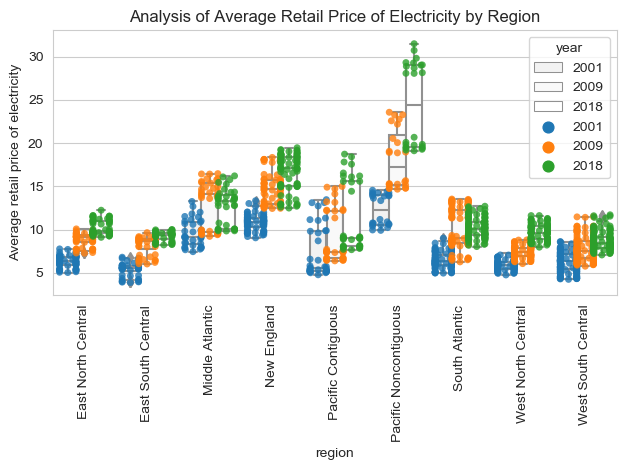

<Figure size 640x480 with 0 Axes>

In [12]:
#Plotting the behavior of Price of Electricity for the years 2001, 2009 and 2018
sns.set_style("whitegrid")

g2=sns.swarmplot(x='region', y='Average retail price of electricity', 
               hue='year', data=df_data_3years, alpha=0.8, dodge=True)
g1=sns.boxplot(x='region', y='Average retail price of electricity', 
                 hue='year',data=df_data_3years, color='white', dodge=True)




plt.title('Analysis of Average Retail Price of Electricity by Region')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.tight_layout()
plt.savefig('price_regions.png')
plt.show()
plt.clf()
plt.rcdefaults() #restore plot default values

In [7]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute the Pearson correlation coefficients
r_taveg = pearson_r(df_data['Average retail price of electricity'], 
                       df_data['TAVG'])
r_tmax = pearson_r(df_data['Average retail price of electricity'], 
                       df_data['TMAX'])
r_tmin = pearson_r(df_data['Average retail price of electricity'], 
                       df_data['TMIN'])

print('Correlation Price-TAVG=',r_taveg)
print('Correlation Price-TMAX=', r_tmax)
print('Correlation Price-TMIN=', r_tmin)


Correlation Price-TAVG= 0.08197931362708175
Correlation Price-TMAX= 0.042190350907942216
Correlation Price-TMIN= 0.1231493190877749


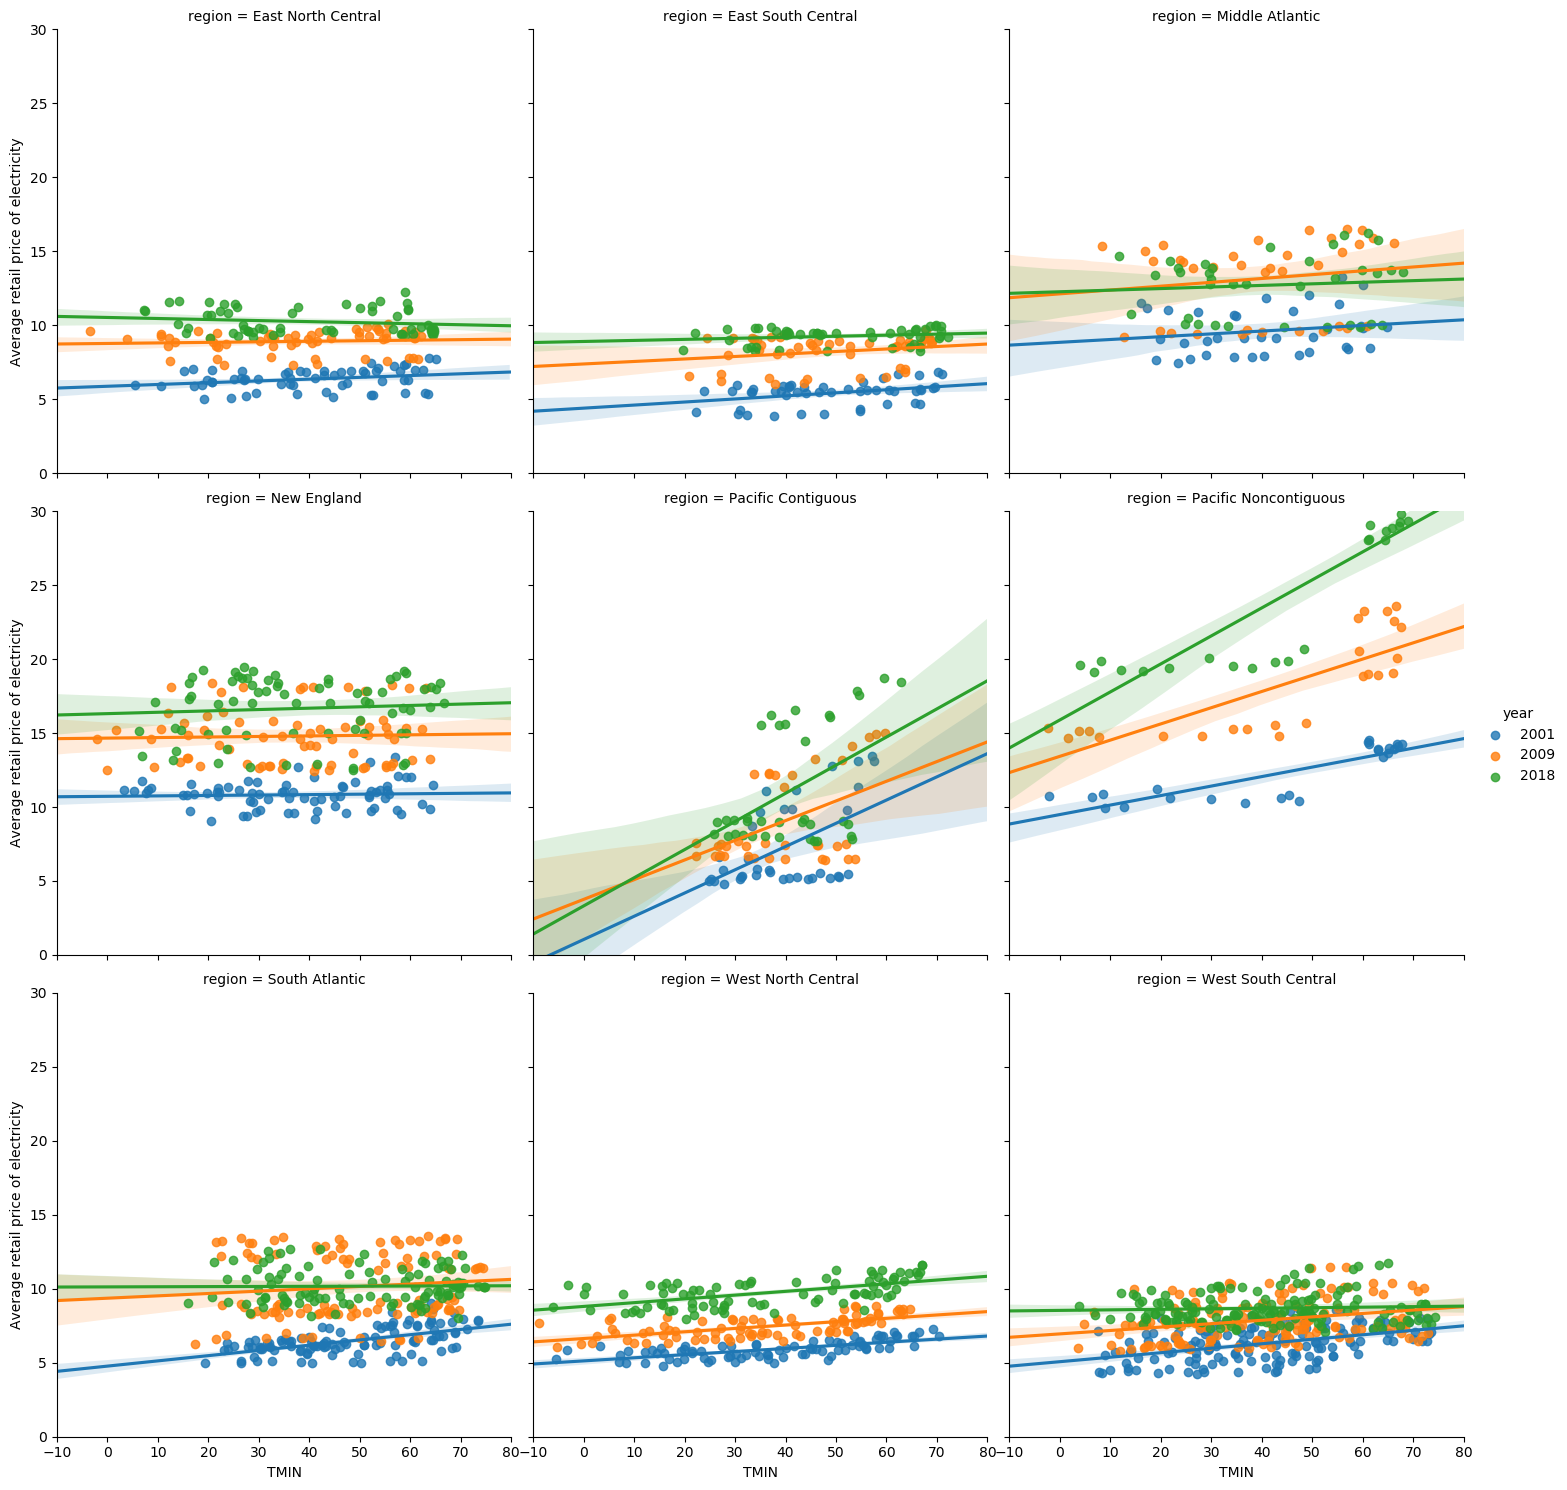

<Figure size 640x480 with 0 Axes>

In [18]:
#Plotting interpolation of TMIN Vs Average retail price of electricity
lm=sns.lmplot(x="TMIN", 
           y="Average retail price of electricity", 
           col="region", 
           col_wrap=3, 
           data=df_data_3years, 
           fit_reg=True,
           hue="year")
axes = lm.axes
axes[0].set_xlim((-10,80))
axes[0].set_ylim((0,30))

plt.savefig('correlation_price_TMIN.png')
plt.show()
plt.clf()





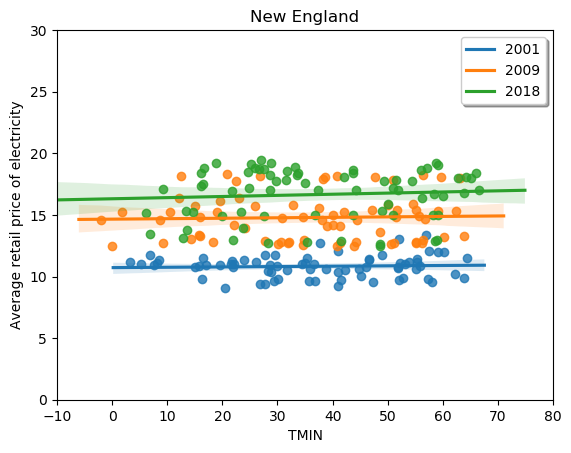

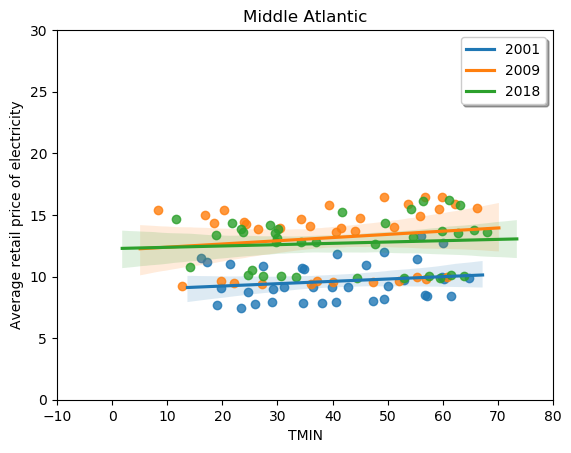

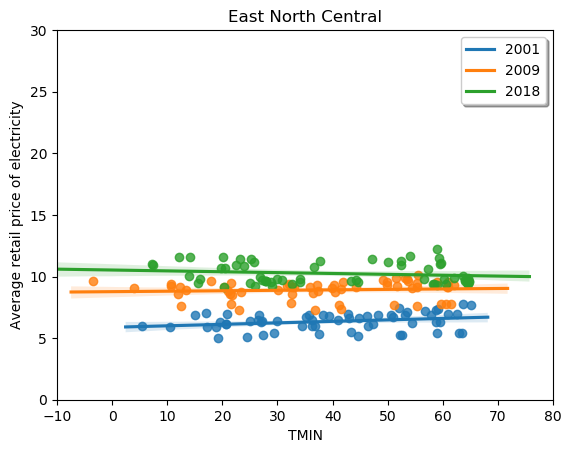

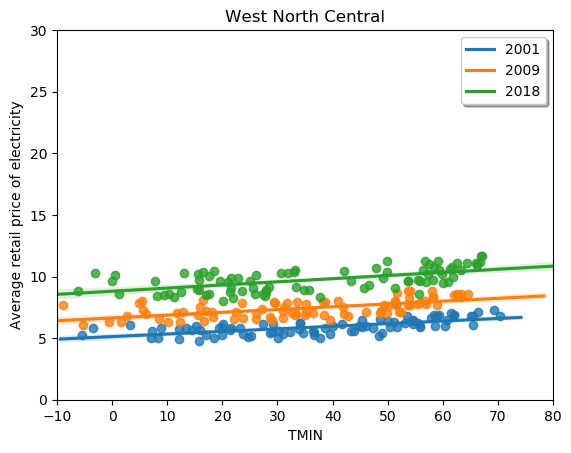

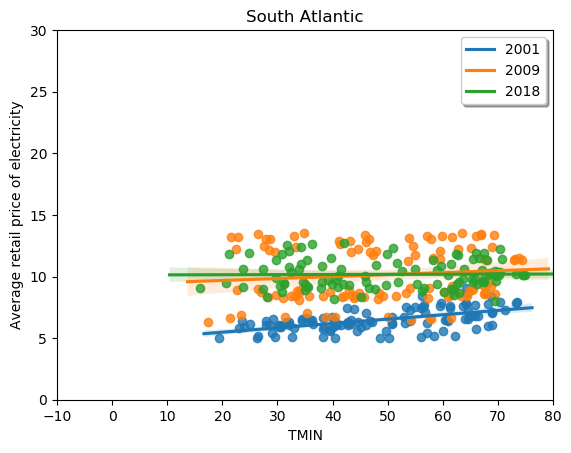

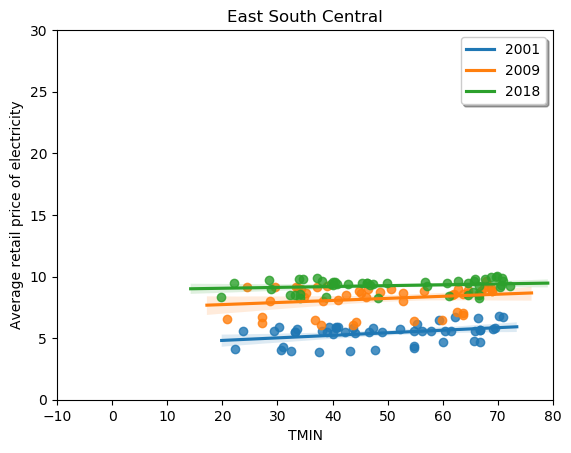

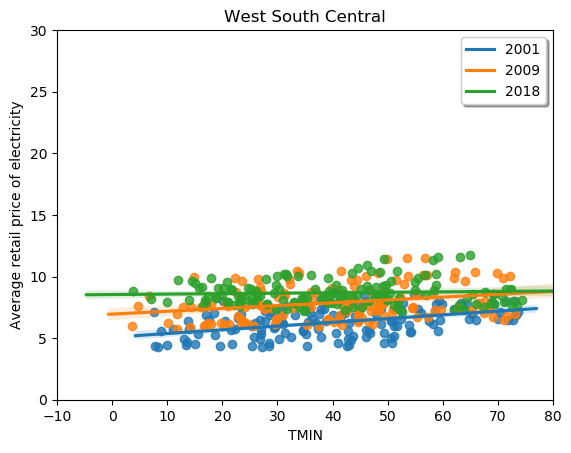

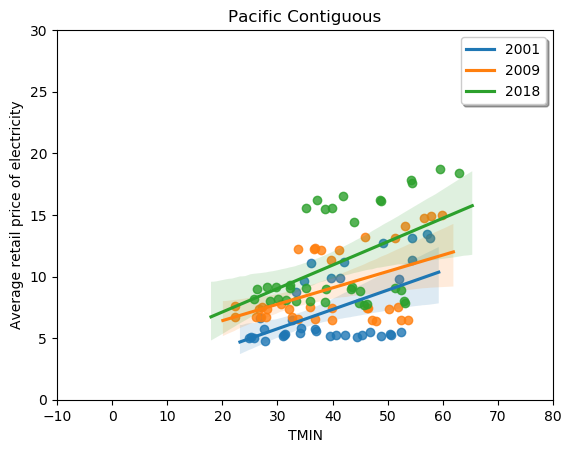

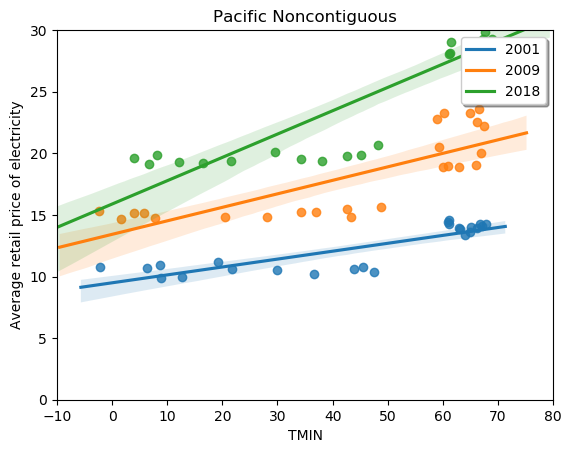

In [19]:
#Computation of linear regression between Average Retail price of Electricity
#and minimim temperature TMIN 


var1='TMIN'
var2='Average retail price of electricity'

df_data_sample_2001=df_data_3years[df_data_3years['year']==2001]
df_data_sample_2009=df_data_3years[df_data_3years['year']==2009]
df_data_sample_2018=df_data_3years[df_data_3years['year']==2018]

for reg in df_reg.columns:
    idx_2001=df_data_sample_2001['region']==reg
    idx_2009=df_data_sample_2009['region']==reg
    idx_2018=df_data_sample_2018['region']==reg
    
    df_data_reg_2001=df_data_sample_2001.loc[idx_2001, slice(None)]
    df_data_reg_2009=df_data_sample_2009.loc[idx_2009, slice(None)]  
    df_data_reg_2018=df_data_sample_2018.loc[idx_2018, slice(None)]  
    
    x_2001=df_data_reg_2001[var1]
    y_2001=df_data_reg_2001[var2]

    x_2009=df_data_reg_2009[var1]
    y_2009=df_data_reg_2009[var2]
    
    x_2018=df_data_reg_2018[var1]
    y_2018=df_data_reg_2018[var2]

    # Perform linear regression: a, b
    a_2001, b_2001 = np.polyfit(x_2001,y_2001,1)
    a_2009, b_2009 = np.polyfit(x_2009,y_2009,1)
    a_2018, b_2018 = np.polyfit(x_2018,y_2018,1)
    
       
    lm1=sns.regplot(x=x_2001, y=y_2001, data=df_data_sample_2001)
    lm2=sns.regplot(x=x_2009, y=y_2009, data=df_data_sample_2009)
    lm3=sns.regplot(x=x_2018, y=y_2018, data=df_data_sample_2018)
    
    axes1 = lm1.axes
    axes2 = lm2.axes
    axes3 = lm3.axes
    axes1.set_xlim((-10,80))
    axes1.set_ylim((0,30))
    
    #plt.xlim=(df_data_sample.min(), df_data_sample.max())
    plt.legend(('2001','2009','2018'),loc='upper right', shadow=True)
    # Label the axes
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(reg)
    

    # Show the plot
    plt.show()